In [17]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xf /content/cifar-10-python.tar.gz

--2022-03-31 16:09:53--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  72.4MB/s    in 2.2s    

2022-03-31 16:09:55 (72.4 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]



In [18]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1=unpickle("/content/cifar-10-batches-py/data_batch_1")
batch2=unpickle("/content/cifar-10-batches-py/data_batch_2")
batch3=unpickle("/content/cifar-10-batches-py/data_batch_3")
batch4=unpickle("/content/cifar-10-batches-py/data_batch_3")
batch5=unpickle("/content/cifar-10-batches-py/data_batch_3")

In [19]:
batch1[b'data'].shape

(10000, 3072)

In [20]:
def get_img(batch):
  images=[]
  y=[]
  for i,img in enumerate(batch[b'data']):
    img_=img.reshape(32,32,3)
    y.append(batch[b'labels'][i])
    images.append(np.array(img_))
  return np.array(images),np.array(y)


In [21]:
import numpy as np
import pandas as pd
import torch 
from torchvision import models
import torch
import cv2
import numpy as np
from scipy.optimize import differential_evolution
import torch.nn as nn
from torch.autograd import Variable

In [22]:
images_1,y_1=get_img(batch1)


In [23]:

import torch.nn.functional as F
import torch.nn as nn

class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        """
            input   - (3, 32, 32)
            block 1 - (32, 32, 32)
            maxpool - (32, 16, 16)
            block 2 - (64, 16, 16)
            maxpool - (64, 8, 8)
            block 3 - (128, 8, 8)
            maxpool - (128, 4, 4)
            block 4 - (128, 4, 4)
            avgpool - (128, 1, 1), reshpe to (128,)
            fc      - (128,) -> (10,)
        """
        # block 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        # block 2
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # block 3
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # block 4
        self.conv7 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256, 10)

    def forward(self, x):

        # block 1
        x = F.relu(self.conv1(x))
        x = F.relu(self.bn1(self.conv2(x)))

        # maxpool
        x = F.max_pool2d(x, 2)

        # block 2
        x = F.relu(self.conv3(x))
        x = F.relu(self.bn2(self.conv4(x)))

        # maxpool
        x = F.max_pool2d(x, 2)

        # block 3
        x = F.relu(self.conv5(x))
        x = F.relu(self.bn3(self.conv6(x)))

        # maxpool
        x = F.max_pool2d(x, 2)

        # block 4
        x = F.relu(self.conv7(x))
        x = F.relu(self.bn4(self.conv8(x)))

        # avgpool and reshape to 1D
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)

        # fc
        x = self.fc(x)

        return x


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt


# One Pixel Attack

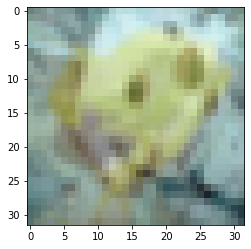

Prediction before attack: frog
Probability: 0.352779

Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.076068
Prob [frog]: 0.064492
Prob [frog]: 0.064492
Prob [frog]: 0.064492
Prob [frog]: 0.064492
Prob [frog]: 0.044511
Prob [frog]: 0.044511
Prob [frog]: 0.044511
Prob [frog]: 0.044511
Prob [frog]: 0.044511
Prob [frog]: 0.044511
Prob [frog]: 0.044511
Prob [frog]: 0.043073
Prob [frog]: 0.033387
Prob [frog]: 0.033387
Prob [frog]: 0.033387
Prob [frog]: 0.033387
Prob [frog]: 0.033387
Prob [frog]: 0.031675
Prob [frog]: 0.031675
Prob [frog]: 0.025934
Prob [frog]: 0.025934
Prob [frog]: 0.025934
Prob [frog]: 0.025934


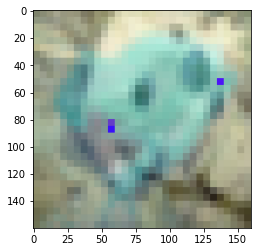

In [25]:
from torchvision import models
import torch
import cv2
import numpy as np
from scipy.optimize import differential_evolution
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt


import argparse

cifar10_class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

parser = argparse.ArgumentParser()
parser.add_argument('--img', type=str, default='airplane.png', help='path to image')
parser.add_argument('--d', type=int, default=3, help='number of pixels to change')
parser.add_argument('--iters', type=int, default=600, help='number of iterations')
parser.add_argument('--popsize', type=int, default=10, help='population size')
parser.add_argument('--model_path', type=str, default='cifar10_basiccnn.pth.tar', help='path to trained model')

import sys
sys.argv=['']
del sys
args = parser.parse_args()
image_path = args.img
d = args.d
iters = args.iters
popsize = args.popsize
model_path = args.model_path

def nothing(x):
    pass


# load image and reshape to (3, 224, 224) and RGB (not BGR)
# preprocess as described here: http://pytorch.org/docs/master/torchvision/models.html

orig = cv2.imread("/content/frog.png")[..., ::-1]
orig = cv2.resize(orig, (32, 32))
img = orig.copy()
shape = orig.shape

plt.imshow(img)
plt.show()

def preprocess(img):
    img = img.astype(np.float32)
    img /= 255.0
    img = img.transpose(2, 0, 1)
    return img

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


model = BasicCNN()
saved = torch.load("/content/cifar10_basiccnn.pth (1).tar", map_location='cpu')
model.load_state_dict(saved['state_dict'])
model.eval()

inp = Variable(torch.from_numpy(preprocess(img)).float().unsqueeze(0))
prob_orig = softmax(model(inp).data.numpy()[0])
pred_orig = np.argmax(prob_orig)
print('Prediction before attack: %s' %(cifar10_class_names[pred_orig]))
print('Probability: %f' %(prob_orig[pred_orig]))
print()


def perturb(x):
    adv_img = img.copy()

    # calculate pixel locations and values
    pixs = np.array(np.split(x, len(x)/5)).astype(int)
    loc = (pixs[:, 0], pixs[:,1])
    val = pixs[:, 2:]
    adv_img[loc] = val

    return adv_img

def optimize(x):
    adv_img = perturb(x)

    inp = Variable(torch.from_numpy(preprocess(adv_img)).float().unsqueeze(0))
    out = model(inp)
    prob = softmax(out.data.numpy()[0])

    return prob[pred_orig]

pred_adv = 0
prob_adv = 0
def callback(x, convergence):
    global pred_adv, prob_adv
    adv_img = perturb(x)

    inp = Variable(torch.from_numpy(preprocess(adv_img)).float().unsqueeze(0))
    out = model(inp)
    prob = softmax(out.data.numpy()[0])

    pred_adv = np.argmax(prob)
    prob_adv = prob[pred_adv]
    if pred_adv != pred_orig and prob_adv >= 0.9:
        print('Attack successful..')
        print('Prob [%s]: %f' %(cifar10_class_names[pred_adv], prob_adv))
        print()
        return True
    else:
        print('Prob [%s]: %f' %(cifar10_class_names[pred_orig], prob[pred_orig]))


def scale(x, scale=5):
    return cv2.resize(x, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)


while True:
    bounds = [(0, shape[0]-1), (0, shape[1]), (0, 255), (0, 255), (0, 255)] * d
    result = differential_evolution(optimize, bounds, maxiter=iters, popsize=popsize, tol=1e-5, callback=callback)

    adv_img = perturb(result.x)
    inp = Variable(torch.from_numpy(preprocess(adv_img)).float().unsqueeze(0))
    out = model(inp)
    prob = softmax(out.data.numpy()[0])
    print('Prob [%s]: %f --> Prob[%s]: %f' %(cifar10_class_names[pred_orig], prob_orig[pred_orig], cifar10_class_names[pred_adv], prob_adv))

    plt.imshow( scale(adv_img[..., ::-1]))

    key = 0
    while True:
        print("Press 'esc' to exit, 'space' to re-run..", end="\r")
        key = int(input("Print Key Value"))
        if key == 27:
            break
        elif key == ord('s'):
            cv2.imwrite('adv_img.png', scale(adv_img[..., ::-1]))
        elif key == 32:
            break
    if key == 27:
        break
cv2.destroyAllWindows()

# Fast Gradient Sign Method

Fast Gradient Sign Method

Actual Image


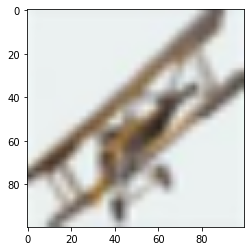


Prediction before attack: airplane
Enter Eps Value21

After attack:Predicted frog


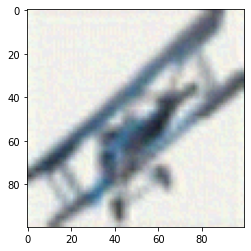

False
Enter your value: False



In [26]:

""" Fast Gradient Sign Method
    Paper link: https://arxiv.org/abs/1607.02533
    Controls:
        'esc' - exit
         's'  - save adversarial image
"""
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torchvision import models
import torch.nn as nn
from torchvision import transforms

import numpy as np
import cv2
import argparse

classes_10 = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

import sys
sys.argv=['']
del sys
parser = argparse.ArgumentParser()
parser.add_argument('--img', type=str, default='images/goldfish.jpg', help='path to image')
parser.add_argument('--model', type=str, default='resnet18', choices=['resnet18', 'resnet50'], required=False, help="Which network?")
parser.add_argument('--y', type=int, required=False, help='Label')
parser.add_argument('--gpu', action="store_true", default=False)

args = parser.parse_args()
image_path = args.img
model_name = args.model
y_true = args.y
gpu = args.gpu

IMG_SIZE = 224

print('Fast Gradient Sign Method')

print()


def nothing(x):
    pass

"""window_adv = 'perturbation'
cv2.namedWindow(window_adv)
cv2.createTrackbar('eps', window_adv, 1, 255, nothing)"""


# load image and reshape to (3, 224, 224) and RGB (not BGR)
# preprocess as described here: http://pytorch.org/docs/master/torchvision/models.html

"""orig = cv2.resize(images_1[10], (32,32))
img = orig.copy().astype(np.float32)
perturbation = np.empty_like(orig)"""
image_path="/content/airplane__1.png"
orig = cv2.imread(image_path)[..., ::-1]
orig = cv2.resize(orig, (100,100))
img = orig.copy().astype(np.float32)
#img=img.reshape(3,224,224)
print("Actual Image")
plt.imshow(orig)
plt.show()
print()
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img /= 255.0
img = (img - mean)/std
img = img.transpose(2, 0, 1)


# load model
model = BasicCNN()
saved = torch.load('/content/cifar10_basiccnn.pth (1).tar', map_location='cpu')
model.load_state_dict(saved['state_dict'])
model.eval()
#model=models.resnet152(pretrained=True)
criterion = nn.CrossEntropyLoss()


device = 'cuda' if gpu else 'cpu'


# prediction before attack
inp = Variable(torch.from_numpy(img).to(device).float().unsqueeze(0), requires_grad=True)

out = model(inp)
pred = np.argmax(out.data.cpu().numpy())
print('Prediction before attack: %s' %(cifar10_class_names[pred].split(',')[0]))
eps=np.random.randint(1,255,255)
flag=False
while not flag:  
    # get trackbar position
    #eps = cv2.getTrackbarPos('eps', window_adv)
    ep=int(input("Enter Eps Value"))
    inp = Variable(torch.from_numpy(img).to(device).float().unsqueeze(0), requires_grad=True)


    out = model(inp)
    loss = criterion(out, Variable(torch.Tensor([float(pred)]).to(device).long()))

    # compute gradients
    loss.backward()
    # 
    # this is it, this is the method
    inp.data = inp.data + ((ep/255.0) * torch.sign(inp.grad.data))
    inp.grad.data.zero_() # unnecessary


    # predict on the adversarial image
    pred_adv = np.argmax(model(inp).data.cpu().numpy())
    print()
    print(" "*60, end='\r') # to clear previous line, not an elegant way
    print("After attack:Predicted",cifar10_class_names[pred_adv])


    # deprocess image
    adv = inp.data.cpu().numpy()[0]
    perturbation = (adv - img).transpose(1, 2, 0) #cv2.normalize((adv - img).transpose(1, 2, 0), perturbation, 0, 255, cv2.NORM_MINMAX, 0)
    adv = adv.transpose(1, 2, 0)
    adv = (adv * std) + mean
    adv = adv * 255.0
    adv = adv[..., ::-1] # RGB to BGR
    adv = np.clip(adv, 0, 255).astype(np.uint8)
    perturbation = perturbation * 255
    perturbation = np.clip(perturbation, 0, 255).astype(np.uint8)


    # display images
    """cv2.imshow(window_adv, perturbation)
    cv2.imshow('adversarial image', adv)"""
    plt.imshow(adv)
    plt.show()
    print(flag)
    flag =input("Enter your value: ")
    """if key ==1:
      flag=True
    elif key ==0:
      cv2.imwrite('img_adv.png', adv)
      cv2.imwrite('perturbation.png', perturbation)"""
print()
cv2.destroyAllWindows()


# Iterative Method

Iterative Method
Actual Image


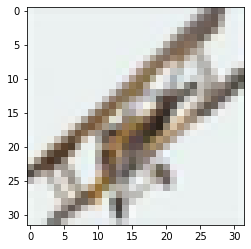


Prediction before attack: airplane
Enter Number Of Iteration: 5
Enter Eps Value:34
eps 34
Iter 5
Iter [  0/  5]:  Prediction: automobile
Printing Adverserial Image


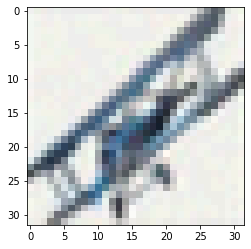

Iter [  1/  5]:  Prediction: automobile
Printing Adverserial Image


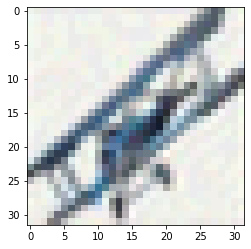

Iter [  2/  5]:  Prediction: automobile
Printing Adverserial Image


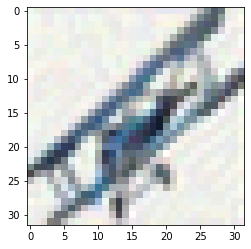

Iter [  3/  5]:  Prediction: automobile
Printing Adverserial Image


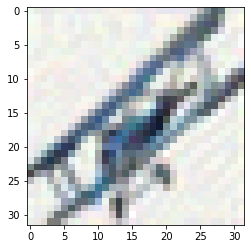

Iter [  4/  5]:  Prediction: automobile
Printing Adverserial Image


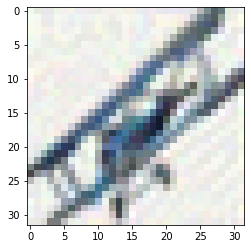


Printing Adverserial Image


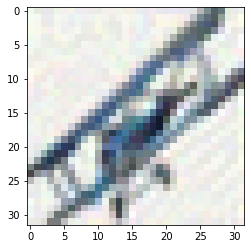

Enter Key Value:1



In [29]:
""" Basic Iterative Method (Targeted and Non-targeted)
    Paper link: https://arxiv.org/abs/1607.02533
    Controls:
        'esc' - exit
         's'  - save adversarial image
      'space' - pause
"""
import torch
from torch.autograd import Variable
from torchvision import models
import torch.nn as nn
from torchvision import transforms

import numpy as np
import cv2
import argparse


import sys
sys.argv=['']
del sys
parser = argparse.ArgumentParser()
parser.add_argument('--img', type=str, default='images/goldfish.jpg', help='path to image')
parser.add_argument('--model', type=str, default='resnet18', choices=['resnet18', 'resnet50'], required=False, help="Which network?")
parser.add_argument('--y', type=int, required=False, help='Label')
parser.add_argument('--gpu', action="store_true", default=False)
parser.add_argument('--target', type=int, required=False, default=None, help='target label')

args = parser.parse_args()
image_path = args.img
model_name = args.model
y_true = args.y
target = args.target
gpu = args.gpu

IMG_SIZE = 32

print('Iterative Method')



# break loop when parameters are changed
break_loop = False

def nothing(x):
    global break_loop
    break_loop = True

"""window_adv = 'perturbation'
cv2.namedWindow(window_adv)
cv2.createTrackbar('eps', window_adv, 1, 255, nothing)
#cv2.createTrackbar('alpha', window_adv, 1, 255, nothing)
cv2.createTrackbar('iter', window_adv, 10, 1000, nothing)"""


# load image and reshape to (3, 224, 224) and RGB (not BGR)
# preprocess as described here: http://pytorch.org/docs/master/torchvision/models.html
"""orig = cv2.resize(images_1[10], (32,32))
img = orig.copy().astype(np.float32)
perturbation = np.empty_like(orig)"""
image_path="/content/airplane__1.png"
orig = cv2.imread(image_path)[..., ::-1]
orig = cv2.resize(orig, (IMG_SIZE, IMG_SIZE))
img = orig.copy().astype(np.float32)
#img=img.reshape(3,224,224)
print("Actual Image")
plt.imshow(orig)
plt.show()
print()
#perturbation = np.empty_like(orig)


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img /= 255.0
img = (img - mean)/std
img = img.transpose(2, 0, 1)


# load model
model = BasicCNN()
saved = torch.load('/content/cifar10_basiccnn.pth (1).tar', map_location='cpu')
model.load_state_dict(saved['state_dict'])
model.eval()

#model=models.resnet152(pretrained=True)
criterion = nn.CrossEntropyLoss()


device = 'cuda' if gpu else 'cpu'


# prediction before attack
inp = Variable(torch.from_numpy(img).to(device).float().unsqueeze(0), requires_grad=True)
orig = torch.from_numpy(img).float().to(device).unsqueeze(0)

out = model(inp)
pred = np.argmax(out.data.cpu().numpy())

if target is not None:
    pred = target

print('Prediction before attack: %s' %(cifar10_class_names[pred].split(',')[0]))
#eps=np.random.randint(1,255,255)

while True:
    inp = Variable(torch.from_numpy(img).to(device).float().unsqueeze(0), requires_grad=True)

    
    #eps = cv2.getTrackbarPos('eps', window_adv)
    #ep=eps[np.random.randint(1,255,1)]
    alpha = 10 #alpha = cv2.getTrackbarPos('alpha', window_adv)
    #num_iter = cv2.getTrackbarPos('iter', window_adv)
    num_iter=int(input("Enter Number Of Iteration: "))
    eps=int(input("Enter Eps Value:"))
    print('eps',eps)
    print('Iter',num_iter)

    break_loop = False

    for i in range(num_iter):

        if break_loop == False:

            ##############################################################
            out = model(inp)
            loss = criterion(out, Variable(torch.Tensor([float(pred)]).to(device).long()))

            loss.backward()

            # this is the method
            perturbation = (alpha/255.0) * torch.sign(inp.grad.data)
            perturbation = torch.clamp((inp.data + perturbation) - orig, min=-eps/255.0, max=eps/255.0)
            inp.data = orig + perturbation

            inp.grad.data.zero_()
            ################################################################

            pred_adv = np.argmax(model(inp).data.cpu().numpy())

            print("Iter [%3d/%3d]:  Prediction: %s"
                    %(i, num_iter,cifar10_class_names[pred_adv].split(',')[0]))


            # deprocess image
            adv = inp.data.cpu().numpy()[0]
            pert = (adv-img).transpose(1,2,0)
            adv = adv.transpose(1, 2, 0)
            adv = (adv * std) + mean
            adv = adv * 255.0
            adv = adv[..., ::-1] # RGB to BGR
            adv = np.clip(adv, 0, 255).astype(np.uint8)
            pert = pert * 255
            pert = np.clip(pert, 0, 255).astype(np.uint8)

            #cv2.imshow(window_adv, pert)
            print("Printing Adverserial Image")
            plt.imshow(adv)
            plt.show()
            key = cv2.waitKey(250) & 0xFF
            if key == 32:
                while True:
                    key2 = cv2.waitKey(1) & 0xFF
                    if key2 == 27:
                        key = 27
                        break
                    elif key2 == 32:
                        break
            elif key == 27:
                break

    print()
    flag=False
    while not flag:
        print("Printing Adverserial Image")
        plt.imshow(adv)
        plt.show()

        key = int(input("Enter Key Value:"))

        if key==1:
            flag=True
        elif key==0:
            cv2.imwrite('img_adv.png', adv)
            cv2.imwrite('perturbation.png', pert)
    if flag:
        break
print()
cv2.destroyAllWindows()